<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment08_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

In [201]:
def normalize_data(x,y):
  xn = (x - np.mean(x)) / np.std(x)
  yn = (y - np.mean(y)) / np.std(y)
  return xn, yn

def compute_covariance(xn,yn):
  n = len(xn)
  Z = np.empty((n,2))
  Z[:,0] = xn
  Z[:,1] = yn
  covar = np.cov(Z.T)
  return covar

def compute_principal_direction(covariance):
  eigen_val,eigen_vec = np.linalg.eig(covariance)
  direction = (eigen_vec * eigen_val).T
  return direction

def compute_projection(point, axis):
  proj = np.dot(point,axis)
  xp = proj * axis[0]
  yp = proj * axis[1]
  return xp, yp

def compute_distance(point1, point2):
  distance = np.sqrt(np.sum((point1-point2)**2,axis = 1))
  return distance

In [202]:
xn, yn = normalize_data(x,y)
covar = compute_covariance(xn,yn)
print(covar)
direction = compute_principal_direction(covar)

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]


In [203]:
eigen_val, eigen_vec = np.linalg.eig(covar)
print(eigen_val)
print(eigen_vec.T)

ndata = np.empty((50,2))
pdata_1 = np.empty((50,2))
pdata_2 = np.empty((50,2))
ndata[:,0] = xn
ndata[:,1] = yn
xp_1, yp_1 = compute_projection(ndata, eigen_vec.T[0])
xp_2, yp_2 = compute_projection(ndata, eigen_vec.T[1])
pdata_1[:,0] = xp_1
pdata_1[:,1] = yp_1
pdata_2[:,0] = xp_2
pdata_2[:,1] = yp_2

[1.77094898 0.26986734]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


# **[output] plot the original data points**

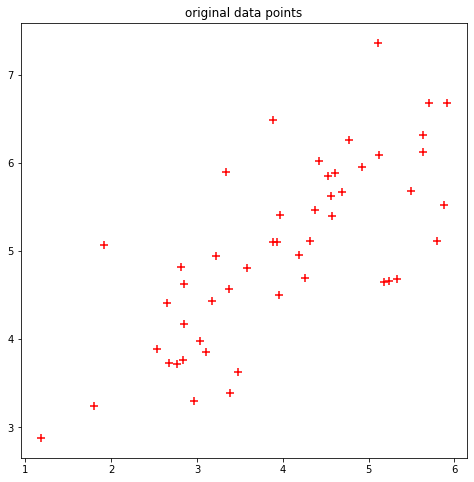

In [206]:
plt.figure(figsize = (8,8))
plt.scatter(x, y , color = "red", marker = '+', s = 80)
plt.title("original data points")
plt.show()

# **[output] plot the normalized data points**

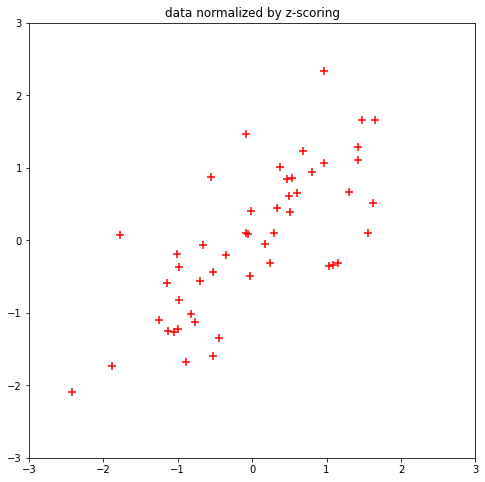

In [207]:
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.title("data normalized by z-scoring")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the principal axes**

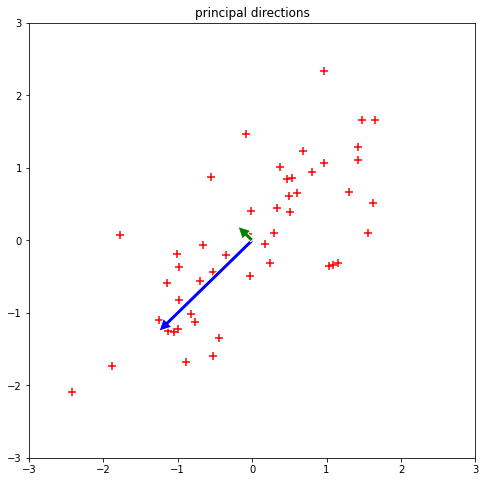

In [208]:
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.annotate("",xy = -direction[0], xytext = (0,0), arrowprops = dict(fc = "blue",ec = "white"))
plt.annotate("",xy = direction[1], xytext = (0,0), arrowprops = dict(fc = "green", ec = "white"))
plt.title("principal directions")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the first principal axis**

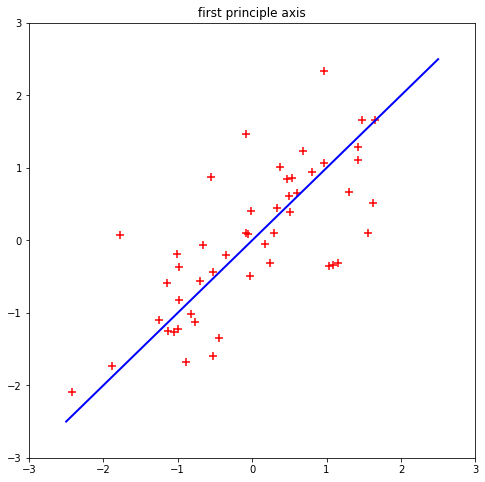

In [209]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.plot(xx, xx, linewidth = 2, c = "blue")
plt.title("first principle axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the project of the normalized data points onto the first principal axis**

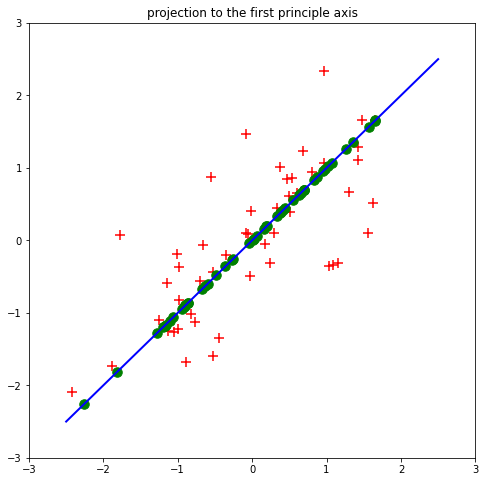

In [211]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 90)
plt.plot(xx, xx, linewidth = 2, c = "blue")
plt.scatter(xp_1,yp_1,c = "green",s = 90)
plt.title("projection to the first principle axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the lines between the normalized data points and their projection points on the first principal axis**

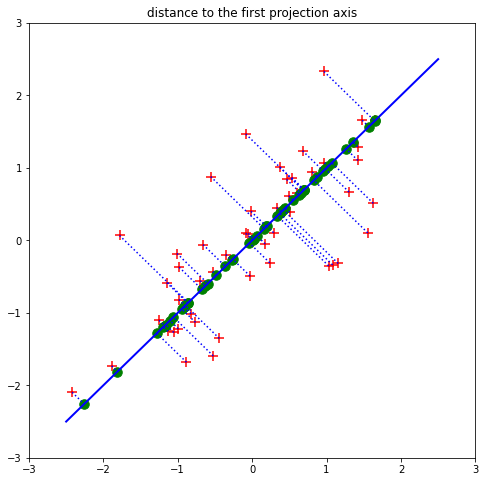

In [224]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 90)
plt.plot(xx, xx, linewidth = 2, c = "blue")
for i in range(50):
  plt.plot([xn[i],xp_1[i]],[yn[i],yp_1[i]],linestyle = ':',c = "blue")
plt.scatter(xp_1,yp_1,c = "green",s = 90)
plt.title("distance to the first projection axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the second principal axis**

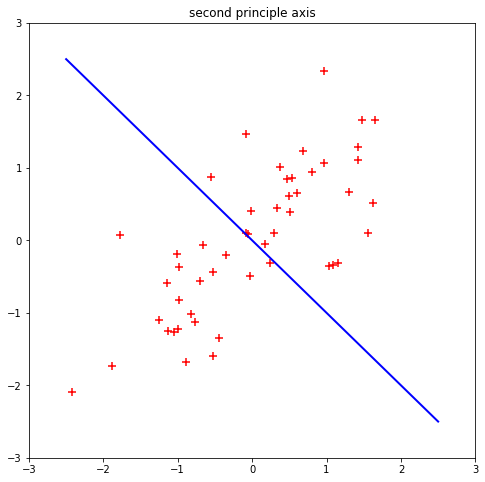

In [221]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.plot(xx, -xx, linewidth = 2, c = "blue")
plt.title("second principle axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the project of the normalized data points onto the second principal axis**

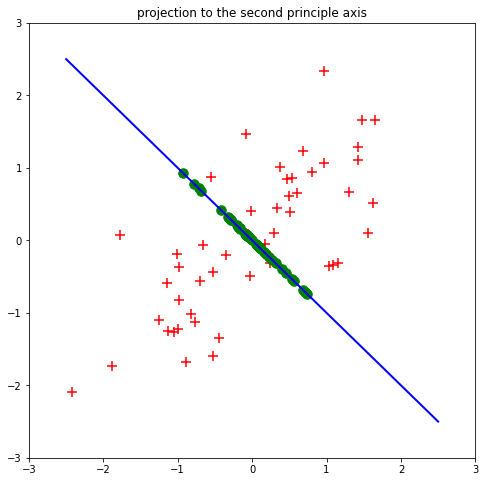

In [223]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 90)
plt.plot(xx, -xx, linewidth = 2, c = "blue")
plt.scatter(xp_2,yp_2,c = "green",s = 90)
plt.title("projection to the second principle axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the lines between the normalized data points and their projection points on the second principal axis**

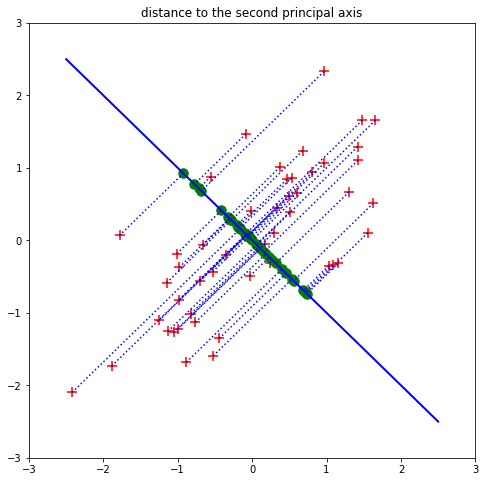

In [225]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 90)
plt.plot(xx, -xx, linewidth = 2, c = "blue")
for i in range(50):
  plt.plot([xn[i],xp_2[i]],[yn[i],yp_2[i]],linestyle = ':',c = "blue")
plt.scatter(xp_2,yp_2,c = "green",s = 90)
plt.title("distance to the second principal axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()